In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV

In [16]:
df = pd.read_csv("BRCA_pam50.tsv", sep="\t", index_col=0)
X_raw = df.iloc[:, :-1]
y = df["Subtype"].to_numpy()

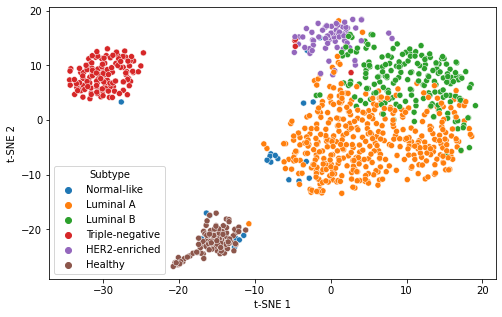

In [17]:
model = TSNE(n_components=2, perplexity=50)
X = model.fit_transform(X_raw)

df1 = pd.DataFrame()
df1["t-SNE 1"] = X[:, 0]
df1["t-SNE 2"] = X[:, 1]
df1["Subtype"] = y

fig, axes = plt.subplots(1, figsize=(8, 5))
sns.scatterplot(x="t-SNE 1", y="t-SNE 2", hue="Subtype", data=df1)
plt.show()

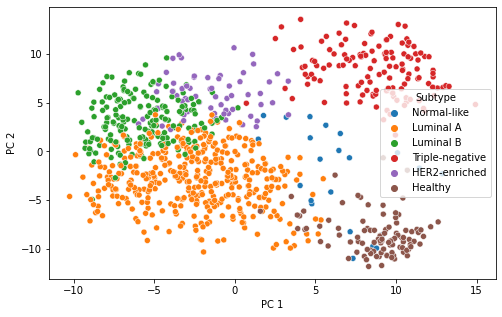

In [18]:
model2 = PCA(n_components=2)
X2 = model2.fit_transform(X_raw)
df1["PC 1"] = X2[:, 0]
df1["PC 2"] = X2[:, 1]
df1["Subtype"] = y

fig, axes = plt.subplots(1, figsize=(8, 5))
sns.scatterplot(x="PC 1", y="PC 2", hue="Subtype", data=df1)
plt.show()

In [20]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.2, random_state=17)

model_TSNE = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", KNeighborsClassifier())
])
model_TSNE.fit(X_train, y_train)

params = {
    "classifier__n_neighbors": [3, 5, 7],
    "classifier__weights": ["uniform", "distance"],
    "classifier__p": [1, 2]}

cv = GridSearchCV(
    model_TSNE, params,
    scoring=make_scorer(accuracy_score),
    cv=RepeatedStratifiedKFold(n_repeats=10))

cv.fit(X, y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__n_neighbors': [3, 5, 7],
                         'classifier__p': [1, 2],
                         'classifier__weights': ['uniform', 'distance']},
             scoring=make_scorer(accuracy_score))

In [21]:
print(cv.best_params_)
print(cv.best_score_)

{'classifier__n_neighbors': 5, 'classifier__p': 2, 'classifier__weights': 'distance'}
0.8833879781420764


In [22]:
model_TSNE = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", KNeighborsClassifier(n_neighbors=5, weights="distance", p=2))
])
model_TSNE.fit(X_train, y_train)
y_pred = model_TSNE.predict(X_test)
print(accuracy_score(y_pred, y_test))

0.8469945355191257


In [23]:
X2_train, X2_test, y_train, y_test = train_test_split(
    X2, y, stratify=y, test_size=0.2, random_state=17)

model_PCA = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", KNeighborsClassifier())
])
model_PCA.fit(X2_train, y_train)

params = {
    "classifier__n_neighbors": [3, 5, 7],
    "classifier__weights": ["uniform", "distance"],
    "classifier__p": [1, 2]}

cv = GridSearchCV(
    model_PCA, params,
    scoring=make_scorer(accuracy_score),
    cv=RepeatedStratifiedKFold(n_repeats=10))

cv.fit(X2, y)

GridSearchCV(cv=RepeatedStratifiedKFold(n_repeats=10, n_splits=5, random_state=None),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', KNeighborsClassifier())]),
             param_grid={'classifier__n_neighbors': [3, 5, 7],
                         'classifier__p': [1, 2],
                         'classifier__weights': ['uniform', 'distance']},
             scoring=make_scorer(accuracy_score))

In [98]:
model_PCA = Pipeline([
    ("scaler", StandardScaler()),
    ("classifier", KNeighborsClassifier(n_neighbors=7, weights="uniform", p=1))
])
model_PCA.fit(X2_train, y_train)

y_pred = model_PCA.predict(X2_test)
print(accuracy_score(y_pred, y_test))

0.8032786885245902
